# Project-1
Apply
logistic Regression,
SVM,
Decision Tree and
RandomForest
on the Loan dataset and check were you will get the best possible accuracy
project note : Dependent Variable is Loan Status

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
loan_df = pd.read_csv("E:\AIML- Artifical intelligence course\Machine learning & Data Science\Assignment ML & DS\Assignment 6/loan.csv")
loan_df[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Dropping Loan ID column as it is not useful
loan_df.drop(['Loan_ID'],axis = 1, inplace = True)
loan_df[:2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handling Null values by using mean, mode

In [6]:
# Applying median on Loan_amount column 
median = loan_df.LoanAmount.median()
loan_df['LoanAmount'] = loan_df.LoanAmount.fillna(median)

In [7]:
# Applying mode on remaining null values column
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace = True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace = True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace = True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace = True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace = True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace = True)

In [8]:
loan_df.isnull().sum() # after handling null values, no null values are present in dataset

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_df[:2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


Checking the categorical values of the null object datatype column.

In [10]:
set(loan_df.Married)

{'No', 'Yes'}

In [11]:
set(loan_df.Dependents)

{'0', '1', '2', '3+'}

In [12]:
set(loan_df.Education)

{'Graduate', 'Not Graduate'}

In [13]:
set(loan_df.Self_Employed)

{'No', 'Yes'}

In [14]:
set(loan_df.Property_Area)

{'Rural', 'Semiurban', 'Urban'}

In [15]:
set(loan_df.Loan_Status)

{'N', 'Y'}

In [16]:
# Applying label encoder on Gender, Married,Dependents, Education, Self Employed, Property_Area and Loan_status
from sklearn.preprocessing import LabelEncoder
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
loan_df[columns] = loan_df[columns].apply(LabelEncoder().fit_transform)
loan_df[:2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0


In [17]:
# Creating Independent and Dependent variables
X = loan_df.drop(['Loan_Status'],axis = 1).values
y = loan_df['Loan_Status'].values

In [18]:
# Applying Standard Scaler as data is in different ranges
X = preprocessing.StandardScaler().fit_transform(X)
X[:2]

array([[ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.07299082, -0.55448733, -0.21124125,  0.2732313 ,  0.41173269,
         1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, -0.52836225, -0.39260074,
        -0.13441195, -0.03873155, -0.21124125,  0.2732313 ,  0.41173269,
        -1.31851281]])

In [19]:
# Training testing the data 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 50)
print("Train set : " , X_train.shape, y_train.shape)
print("Test set: ", X_test.shape,  y_test.shape)

Train set :  (491, 11) (491,)
Test set:  (123, 11) (123,)


# Modeling the data using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'saga')
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print(f"Accuracy using Logistic Regression: {f1_score(y_test,y_pred)*100}")

Accuracy using Logistic Regression: 85.7142857142857


# Modeling the data using SVM

Applying kernel = RBF

In [21]:
# since our dependent variable is discrete we will use SVC.
from sklearn import svm
clf = svm.SVC(kernel ='rbf')
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
print(f"Accuracy using SVM(kernel = RBF): {f1_score(y_test,y_pred1, average = 'weighted')*100}")

Accuracy using SVM(kernel = RBF): 74.6990306441526


Applying kernel = Poly

In [22]:
clf1 = svm.SVC(kernel = 'poly')
clf1.fit(X_train,y_train)
y_pred2 = clf1.predict(X_test)
print(f"Accuracy using SVM(kernel - Poly): {f1_score(y_test,y_pred2,average ='weighted')*100}")

Accuracy using SVM(kernel - Poly): 75.77622754553087


Applying kernel = linear

In [23]:
clf2 = svm.SVC(kernel = 'linear')
clf2.fit(X_train,y_train)
y_pred3 = clf2.predict(X_test)
print(f"Accuracy using SVM(kernel - Linear): {f1_score(y_test,y_pred3,average ='weighted')*100}")

Accuracy using SVM(kernel - Linear): 76.50624274099881


Applying kernel ='sigmoid'

In [24]:
clf3 = svm.SVC(kernel = 'sigmoid')
clf3.fit(X_train,y_train)
y_pred4 = clf3.predict(X_test)
print(f"Accuracy using SVM(kernel - sigmoid): {f1_score(y_test,y_pred4, average = 'weighted')*100}")

Accuracy using SVM(kernel - sigmoid): 74.6990306441526


# Modeling the data using Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier(criterion = 'entropy')
clf4.fit(X_train,y_train)
y_pred5 = clf4.predict(X_test)
print(f"Accuracy using DecisionTree): {f1_score(y_test,y_pred5)*100}")

Accuracy using DecisionTree): 81.437125748503


# Modeling the data using Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion ='entropy')
classifier.fit(X_train,y_train)
y_pred6 = classifier.predict(X_test)
print(f"Accuracy using RandomForest: {f1_score(y_test,y_pred6)*100}")

Accuracy using RandomForest: 82.48587570621469


# Project-2
Apply Exploratory Data Analysis on the FifaDataset
Convert the appropriate columns to machine understandable columns using label encoding
Handle Null values
Apply the correlation and remove the column which are more than 60% correlated
Apply the variance and remove the columns whose variance is less that 20%
Understand the Dataset whether the dataset is corr

In [61]:
# Data Analysis
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
fifa_df = pd.read_csv("E:\AIML- Artifical intelligence course\Machine learning & Data Science\Assignment ML & DS\Assignment 6/fifa_cleaned.csv")
fifa_df[:2]

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3


In [64]:
fifa_df.shape

(17954, 92)

In [65]:
fifa_df.columns

Index(['id', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'work_rate', 'body_type', 'release_clause_euro', 'club_team',
       'club_rating', 'club_position', 'club_jersey_number', 'club_join_date',
       'contract_end_year', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
  

In [66]:
fifa_df.info() # to get the information of entire column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

Before analyzing the data, we are going to do feature selection where we are going to drop columns which are not necessary or the columns which gives same info in other columns like ID, Full name(as short name mentions the same data), birth_data(it's not required as we have age col which tells us the age of the players),club jersey number(not required for data analysis), national_team(same data mentioned in nationality col),national_rating,national team position,national jersey number(not required for data analysis),tags and traits(summary of attributes of a player which is already mentioned in diff columns, also data is in text format)  

In [67]:
# dropping columns which are not necessary or which are duplicate column.
fifa_df.drop(['id','full_name','birth_date','club_jersey_number','national_team','national_rating','national_team_position','national_jersey_number','tags','traits'], axis =1, inplace = True)

In [68]:
fifa_df[:2]

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3


# Handling Null values

In [69]:
#pd.set_option('display.max_rows',100) # this option helps us to get all rows having null values
fifa_df.isnull().sum() # shows the null values present in the column

name             0
age              0
height_cm        0
weight_kgs       0
positions        0
              ... 
LB            2065
LCB           2065
CB            2065
RCB           2065
RB            2065
Length: 82, dtype: int64

In [70]:
# handling null values 
fifa_df['value_euro'].fillna(fifa_df['value_euro'].mean(),inplace = True)
fifa_df['wage_euro'].fillna(fifa_df['wage_euro'].mean(), inplace = True)
fifa_df['release_clause_euro'].fillna(fifa_df['release_clause_euro'].mean(),inplace = True)
fifa_df['club_team'].fillna('NA', inplace = True)
fifa_df['club_rating'].fillna(0, inplace = True)
fifa_df['club_position'].fillna('NA',inplace = True)
fifa_df['club_join_date'].fillna(0,inplace = True)
fifa_df['contract_end_year'].fillna(0,inplace = True)

In [71]:
# Converting skill rating at each position and treating the null values
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM','RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
                 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for col in skill_columns:
    fifa_df[col] = fifa_df[col].apply(skillConverter)
    fifa_df[col].fillna(fifa_df[col].mean(),inplace = True)

In [72]:
fifa_df.isnull().sum() # after treating all null values, no null values are present in dataset

name          0
age           0
height_cm     0
weight_kgs    0
positions     0
             ..
LB            0
LCB           0
CB            0
RCB           0
RB            0
Length: 82, dtype: int64

In [75]:
fifa_df[:2] # new dataframe

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,...,66.0,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,...,74.0,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0


# Apply Exploratory Data Analysis on the FifaDataset

Analyzing 50 countries with most number of players playing football

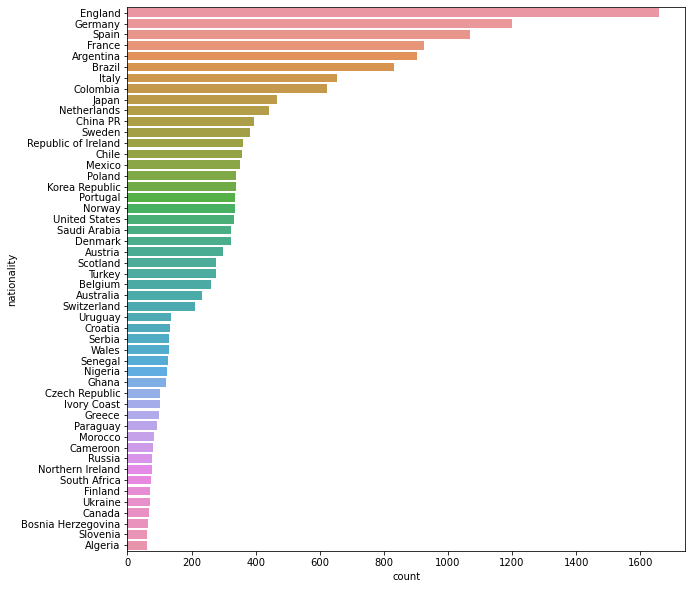

In [76]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'nationality', data=fifa_df, order = fifa_df.nationality.value_counts().iloc[:50].index);

from the above data, we can analyze that England has highest number of football players by over 1600 followed by Germany,Spain,France,Argentina, Brazil, Italy and so on.

Positions

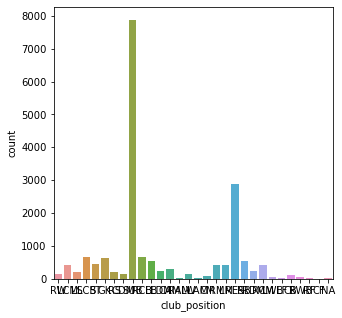

In [78]:
plt.subplots(figsize=(5,5))
sns.countplot(x='club_position',data=fifa_df)
plt.show()

From the above dataset, we can note that players use more SUB positions followed by RES position

Sprint Speed and age relation

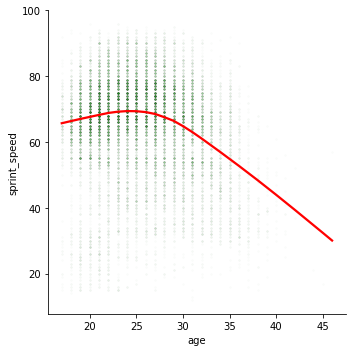

In [81]:
sns.lmplot(data = fifa_df, x = 'age', y = 'sprint_speed',lowess=True,scatter_kws={'alpha':0.01, 's':3,'color':'green'}, 
           line_kws={'color':'red'})

We can observe that as age increases, sprint speed decreases

Top 10 club teams with highest player's average value

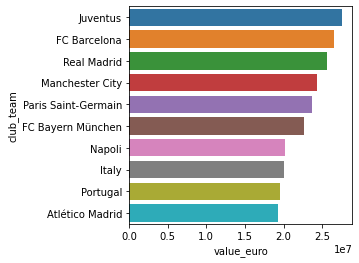

In [85]:
top10_clubteams = fifa_df.groupby('club_team').value_euro.mean().reset_index().sort_values(by ='value_euro',ascending = False)
top10_clubteams.head(10)
plt.figure(figsize =(4,4))
sns.barplot(x = top10_clubteams.head(10).value_euro,y = top10_clubteams.head(10)['club_team'])
plt.show()

From the above, we can say that 'Juventus' club players has the highest average value, followed by Barcelona, Read madrid, Manchester city and so on.

# Convert the appropriate columns to machine understandable columns using label encoding

In [86]:
fifa_df_objectcols = fifa_df.select_dtypes(include =['object']).columns
fifa_df_objectcols

Index(['name', 'positions', 'nationality', 'preferred_foot', 'work_rate',
       'body_type', 'club_team', 'club_position', 'club_join_date',
       'contract_end_year'],
      dtype='object')

In [93]:
# Applying label encoder on Preferred foot, Work rate and body type
from sklearn.preprocessing import LabelEncoder
columns = ['preferred_foot','work_rate','body_type']
fifa_df[columns] = fifa_df[columns].apply(LabelEncoder().fit_transform)

In [94]:
#pd.set_option('display.max_columns',100)
fifa_df[:2]

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,...,66.0,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,...,74.0,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0


# Apply the correlation and remove the column which are more than 60% correlated

In [95]:
corr = fifa_df.corr()
corr

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
age,1.000000,0.059579,0.233819,0.461529,-0.259579,0.081621,0.151531,0.002259,0.259977,0.061108,...,0.306900,0.352139,0.352139,0.352139,0.306900,0.292349,0.315772,0.315772,0.315772,0.292349
height_cm,0.059579,1.000000,0.495320,0.038080,0.008526,0.011070,0.021136,0.050176,0.026850,-0.130464,...,-0.047098,0.045719,0.045719,0.045719,-0.047098,0.007118,0.151911,0.151911,0.151911,0.007118
weight_kgs,0.233819,0.495320,1.000000,0.150521,-0.015099,0.044217,0.061651,0.072883,0.085086,-0.128875,...,0.019134,0.139384,0.139384,0.139384,0.019134,0.078883,0.269147,0.269147,0.269147,0.078883
overall_rating,0.461529,0.038080,0.150521,1.000000,0.647249,0.627409,0.574453,-0.047754,0.489416,0.216394,...,0.591456,0.575791,0.575791,0.575791,0.591456,0.530271,0.431787,0.431787,0.431787,0.530271
potential,-0.259579,0.008526,-0.015099,0.647249,1.000000,0.572539,0.481469,-0.040815,0.358874,0.167735,...,0.338373,0.306895,0.306895,0.306895,0.338373,0.293948,0.196129,0.196129,0.196129,0.293948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LB,0.292349,0.007118,0.078883,0.530271,0.293948,0.301252,0.299719,-0.091231,0.242125,0.002758,...,0.981756,0.967924,0.967924,0.967924,0.981756,1.000000,0.924220,0.924220,0.924220,1.000000
LCB,0.315772,0.151911,0.269147,0.431787,0.196129,0.210646,0.228198,-0.037585,0.199828,-0.071414,...,0.849248,0.930513,0.930513,0.930513,0.849248,0.924220,1.000000,1.000000,1.000000,0.924220
CB,0.315772,0.151911,0.269147,0.431787,0.196129,0.210646,0.228198,-0.037585,0.199828,-0.071414,...,0.849248,0.930513,0.930513,0.930513,0.849248,0.924220,1.000000,1.000000,1.000000,0.924220
RCB,0.315772,0.151911,0.269147,0.431787,0.196129,0.210646,0.228198,-0.037585,0.199828,-0.071414,...,0.849248,0.930513,0.930513,0.930513,0.849248,0.924220,1.000000,1.000000,1.000000,0.924220


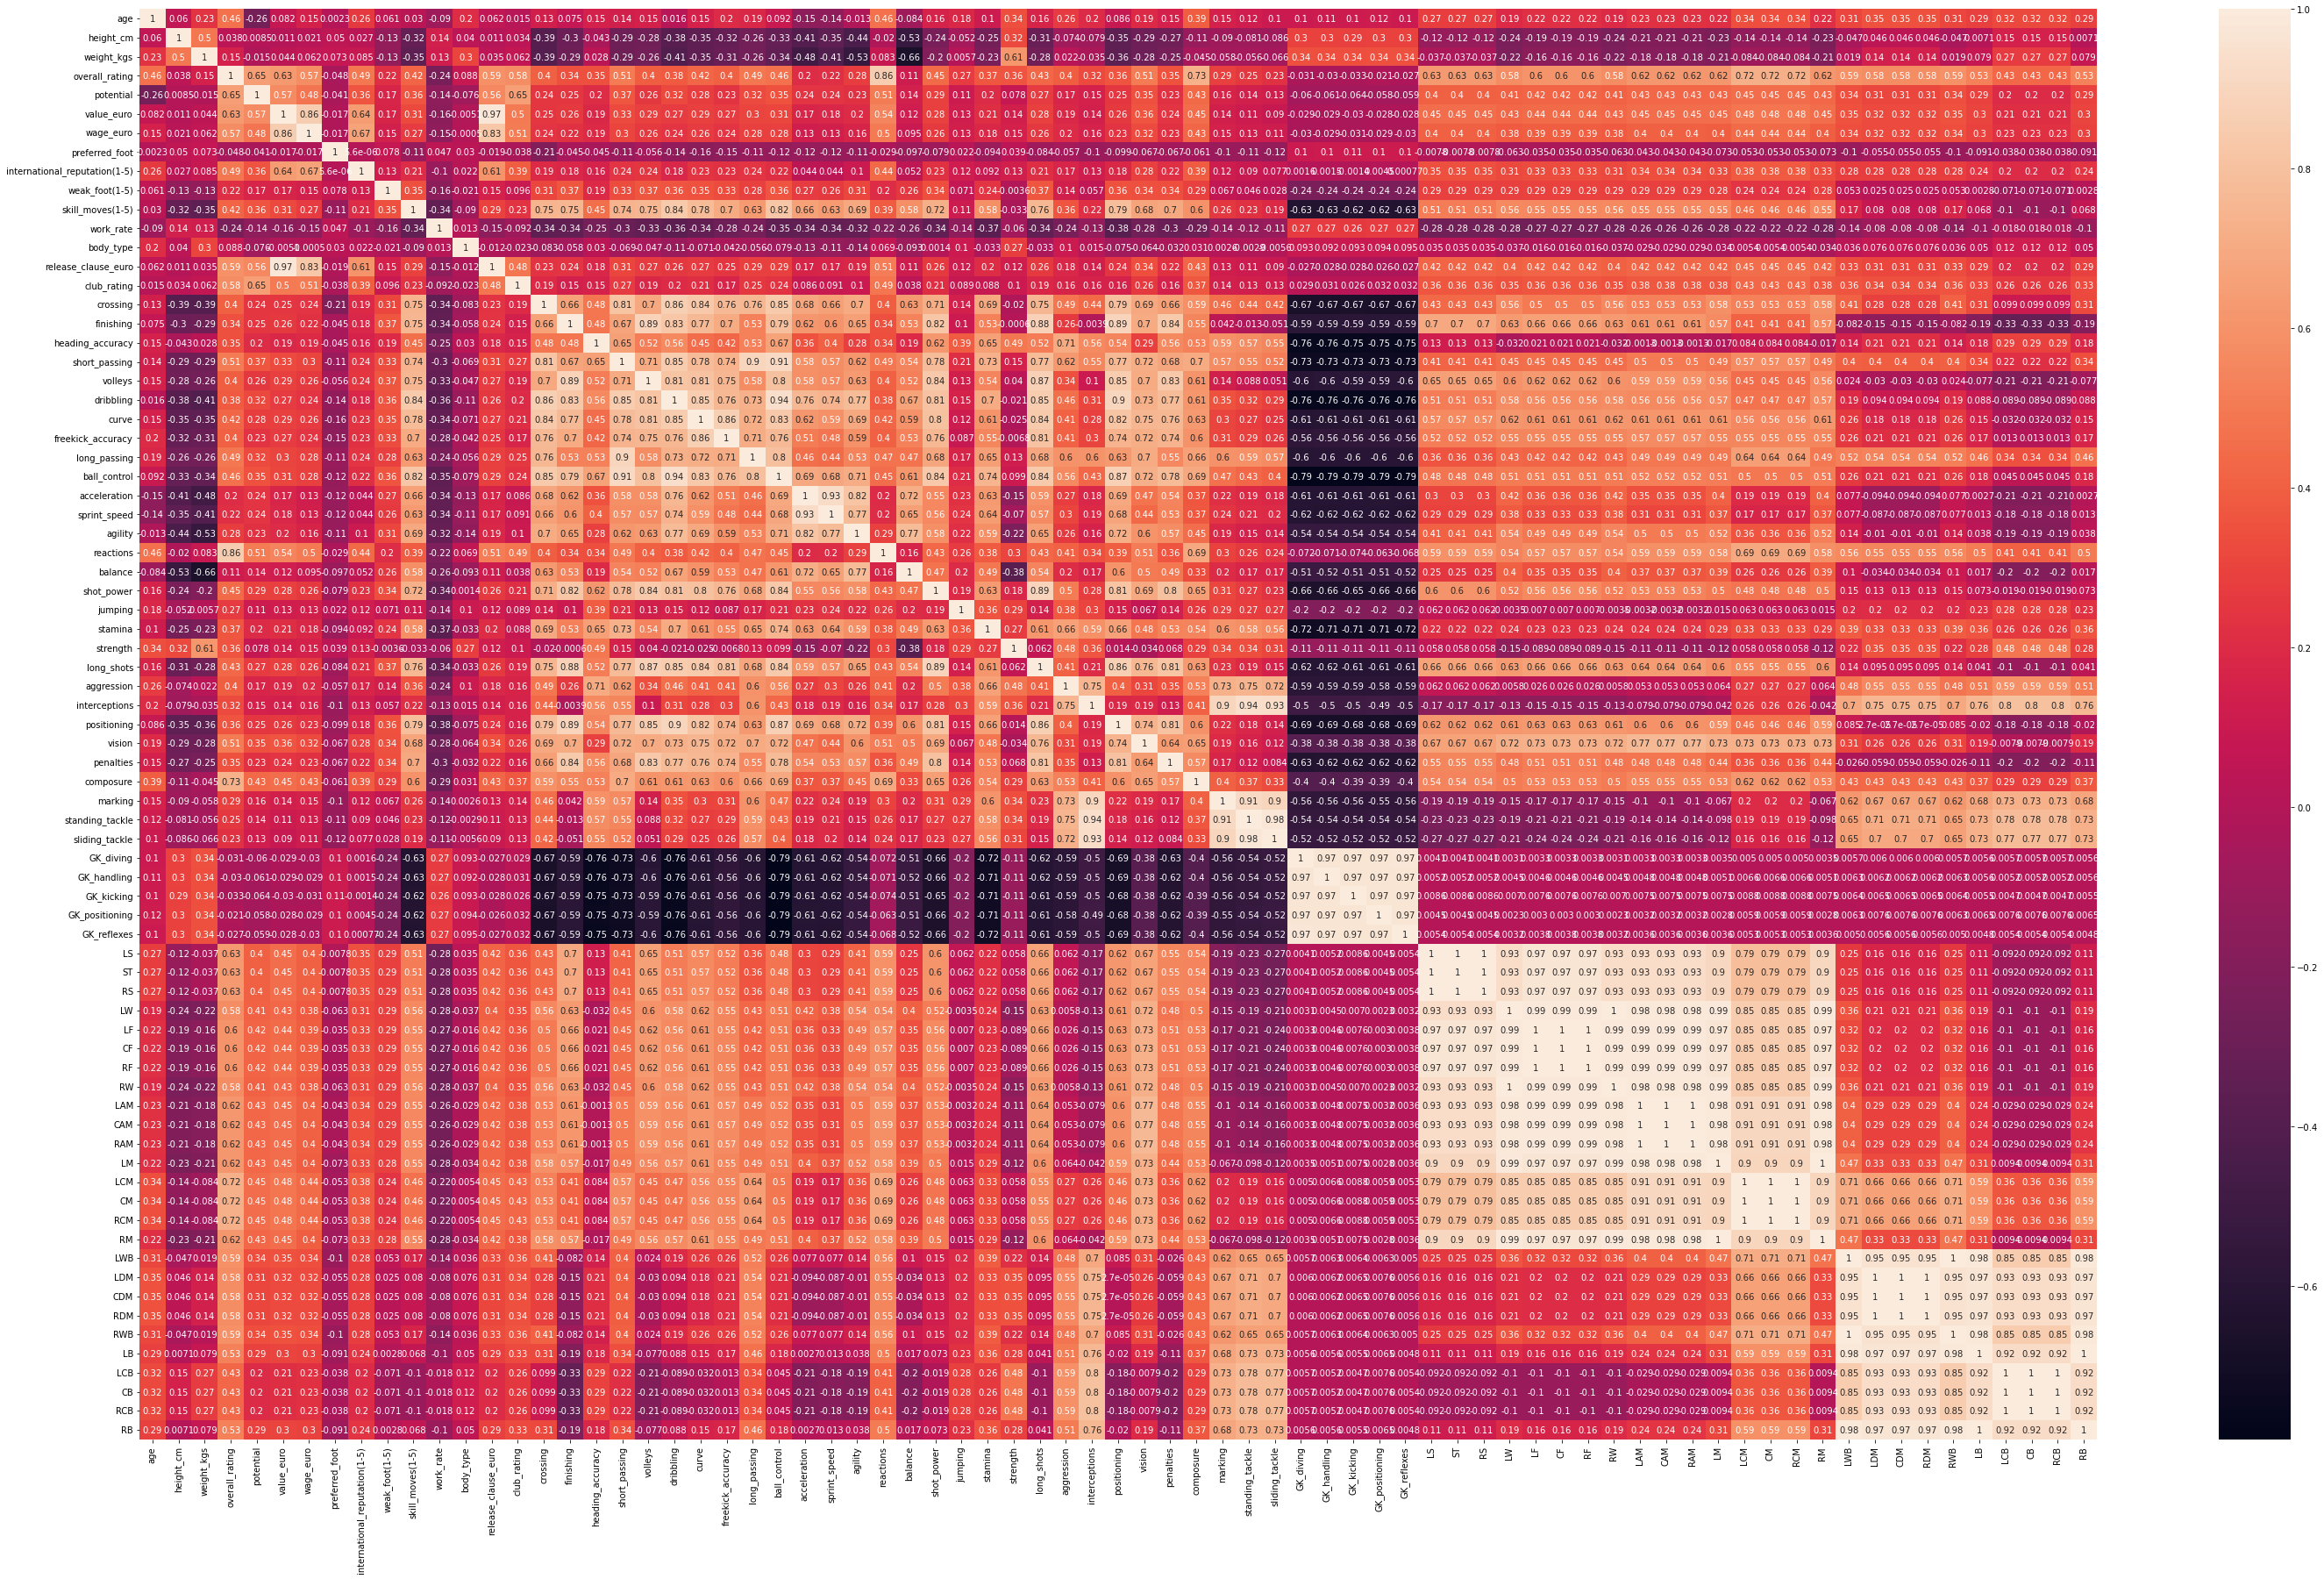

In [96]:
# plotting correlation matrix in the graph
plt.figure(figsize=(50,30))
sns.heatmap(corr, annot=True)
plt.show()

# Understand the Dataset whether the dataset is corr

The above representation which represents the relation among the properties of the attributes of football players. From this we can understand that the goalkeepers in the FIFA19 are all closely rated as the GK skills in the heatmap show strong relations and the positions of the football players such as LS,ST, RS, LCM, CM and so on are highly correlated as compared to player skills like crossing, dribbling, sliding, heading_accuracy, short_passing which signifies that positions of the football players and the goalkeepers skills are more important.

# After applying correlation removing the column which are more than 60% correlated

In [98]:
# applying threshold limit and storing highly correlated col names in the set as set doesn't allow duplication
st = set()
for i in range (len(corr)):
    for j in range(i):
        if abs(corr.iloc[i][j]) > 0.6:
            st.add(corr.columns[i])
st

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK_diving',
 'GK_handling',
 'GK_kicking',
 'GK_positioning',
 'GK_reflexes',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'acceleration',
 'aggression',
 'agility',
 'balance',
 'ball_control',
 'club_rating',
 'composure',
 'crossing',
 'curve',
 'dribbling',
 'finishing',
 'freekick_accuracy',
 'interceptions',
 'international_reputation(1-5)',
 'long_passing',
 'long_shots',
 'marking',
 'penalties',
 'positioning',
 'potential',
 'reactions',
 'release_clause_euro',
 'short_passing',
 'shot_power',
 'sliding_tackle',
 'sprint_speed',
 'stamina',
 'standing_tackle',
 'strength',
 'value_euro',
 'vision',
 'volleys',
 'wage_euro'}

In [104]:
# creating new dataframe and removing highly correlated columns
fifa_df1 = fifa_df.drop(st,axis = 1)
fifa_df1[:2]

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,preferred_foot,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,club_team,club_position,club_join_date,contract_end_year,heading_accuracy,jumping
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,0,4,4,7,4,FC Barcelona,RW,2004-07-01,2021,70,68
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,1,5,4,2,3,Tottenham Hotspur,LCM,2013-08-30,2020,52,50


In [105]:
fifa_df.shape # Original dataframe containing 82 cols

(17954, 82)

In [106]:
fifa_df1.shape # after applying correlation, dataframe contains only 18 cols i.e 64 cols got removed 

(17954, 18)

# Apply the variance and remove the columns whose variance is less that 20%

In [107]:
# dropping object type col from the datset
fifa_df1.drop(['name','positions','nationality','club_team','club_join_date','club_position','contract_end_year'],axis = 1,inplace = True)

In [116]:
fifa_df1[:2]

,age,height_cm,weight_kgs,overall_rating,preferred_foot,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,heading_accuracy,jumping
0,31,170.18,72.1,94,0,4,4,7,4,70,68
1,27,154.94,76.2,88,1,5,4,2,3,52,50


In [117]:
# creating dependent and independent variable
X = fifa_df1.drop('overall_rating',axis =1)
y = fifa_df1['overall_rating']

In [118]:
#Applying threshold limit
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold = 0.20)
var.fit(X)
var.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [119]:
notuseful_columns = X.columns[var.get_support()== False]
notuseful_columns

Index(['preferred_foot'], dtype='object')

In [120]:
X = X.drop(notuseful_columns, axis =1)
X[:2] # new usefulindependent variable

,age,height_cm,weight_kgs,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,heading_accuracy,jumping
0,31,170.18,72.1,4,4,7,4,70,68
1,27,154.94,76.2,5,4,2,3,52,50
